In [44]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [45]:
#data import
game_data = pd.read_csv('data/clean_data.csv')

In [46]:
cat_price = pd.DataFrame(game_data[["AppID", "Name", "Price", "Categories"]])

In [47]:
#generate table of categories

a = cat_price.head(1)
json_table = []
cat_price_json = cat_price.to_json(orient='records')
cat_price_json = json.loads(cat_price_json)

for j in cat_price_json:
    test = {}
    cats = j["Categories"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if cats != None:
        cats = cats.split(",")
        for i in cats:
            test[i] = True

    json_table.append(test)

print(len(json_table))

16081


In [48]:
cat_price_table = pd.DataFrame(json_table)
print(cat_price_table.shape)
print(cat_price_table.columns.tolist())
cat_cols = cat_price_table.columns.tolist()
cat_price_table.fillna(value=False, inplace=True)

cat_price_table.head()

(16081, 41)
['AppID', 'Name', 'Price', 'Single-player', 'Multi-player', 'MMO', 'PvP', 'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases', 'Steam Achievements', 'Steam Trading Cards', 'Partial Controller Support', 'Steam Cloud', 'Remote Play on Tablet', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats', 'Steam Leaderboards', 'Remote Play on Phone', 'Shared/Split Screen PvP', 'Captions available', 'Steam Workshop', 'Full controller support', 'Includes level editor', 'LAN Co-op', 'LAN PvP', 'Remote Play on TV', 'Shared/Split Screen Co-op', 'Steam Turn Notifications', 'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Commentary available', 'Includes Source SDK', 'Mods (require HL2)', 'Mods', 'Tracked Controller Support', 'VR Only']


,AppID,Name,Price,Single-player,Multi-player,MMO,PvP,Online PvP,Co-op,Online Co-op,...,Steam Turn Notifications,VR Support,SteamVR Collectibles,Valve Anti-Cheat enabled,Commentary available,Includes Source SDK,Mods (require HL2),Mods,Tracked Controller Support,VR Only
0,1469160,Wartune Reborn,0.00,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,320150,Deadlings: Rotten Edition,3.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1026420,WARSAW,23.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,485000,Cthulhu Realms,0.00,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1454010,Diary of Lucie,12.99,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


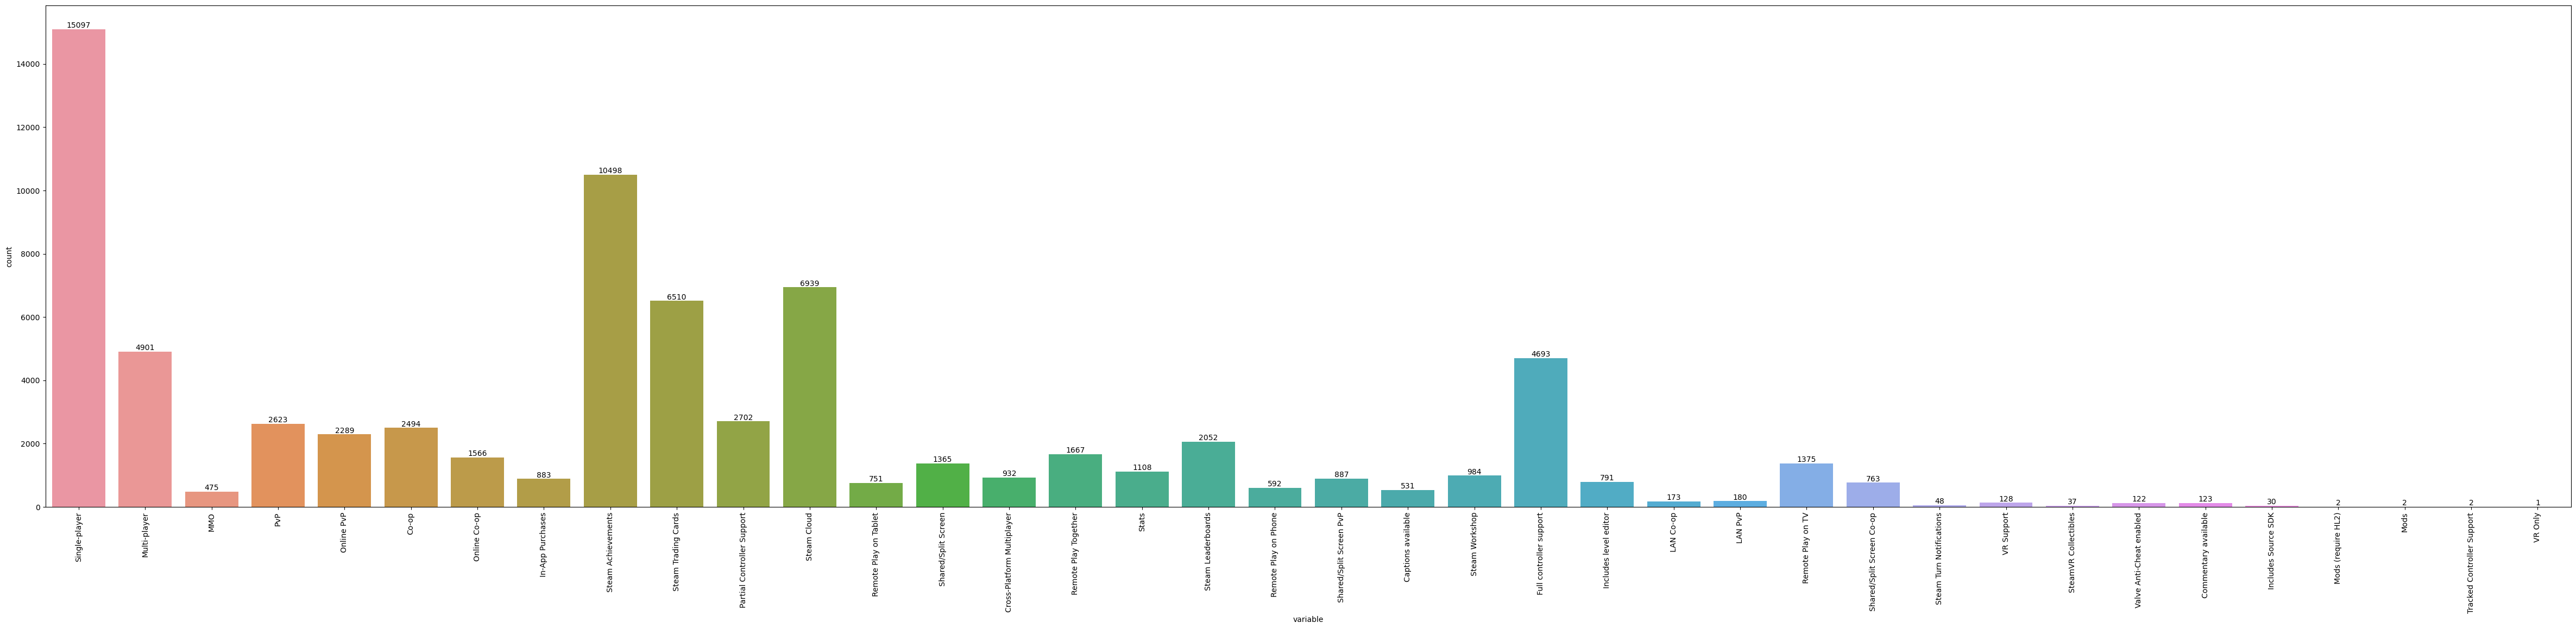

In [49]:
cat_table = cat_price_table.drop(columns =['Price', 'AppID', "Name"])

cat2 = cat_table.melt(value_vars=cat_table.columns)
cat2 = cat2[cat2["value"] != False]
f = plt.figure(figsize=(60, 12))

graph = sb.countplot(data=cat2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()


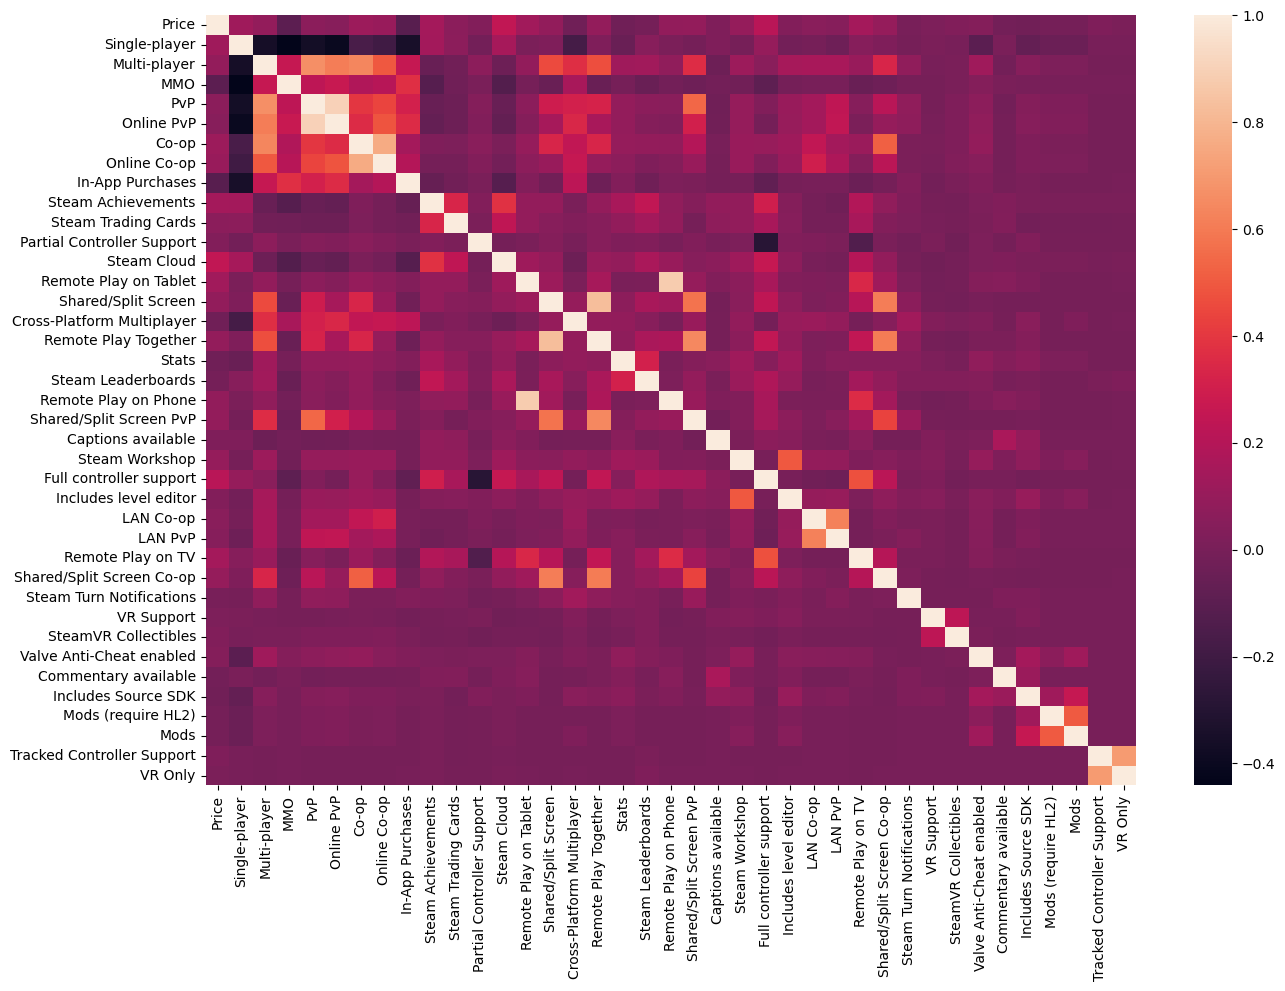

In [50]:
cat_price_a = cat_price_table.drop(columns =['AppID'])

plt.figure(figsize=(15,10))
sb.heatmap(data=cat_price_a.corr())
plt.show()

In [51]:
cat_table_melted = pd.melt(cat_price_table, id_vars=['Price'], value_vars=cat_table.columns)
cat_table_melted.head()

,Price,variable,value
0,0.00,Single-player,True
1,3.99,Single-player,True
2,23.99,Single-player,True
3,0.00,Single-player,True
4,12.99,Single-player,True


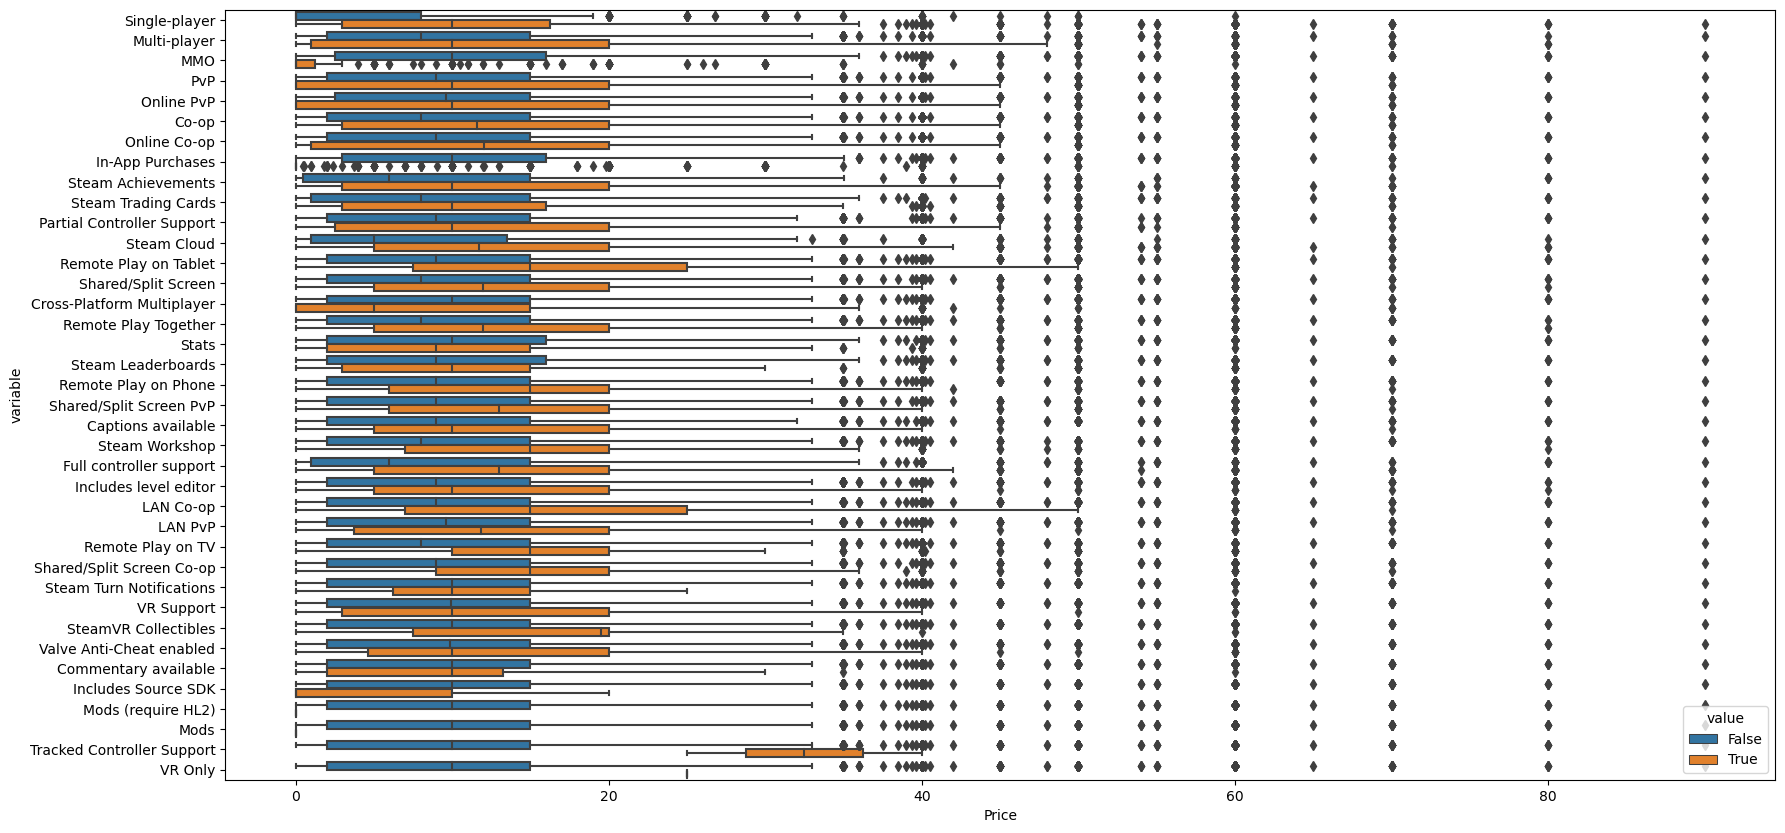

In [52]:
plt.figure(figsize=(20,10))
sb.boxplot(x=cat_table_melted["Price"], y=cat_table_melted["variable"], hue=cat_table_melted["value"], orient="h")
plt.show()

In [53]:
T_table = cat_table_melted.drop(cat_table_melted[cat_table_melted.value == False].index)
T_table.describe()

,Price
count,76316.000000
mean,12.828304
std,12.499113
min,0.000000
25%,2.990000
50%,9.990000
75%,19.990000
max,89.990000


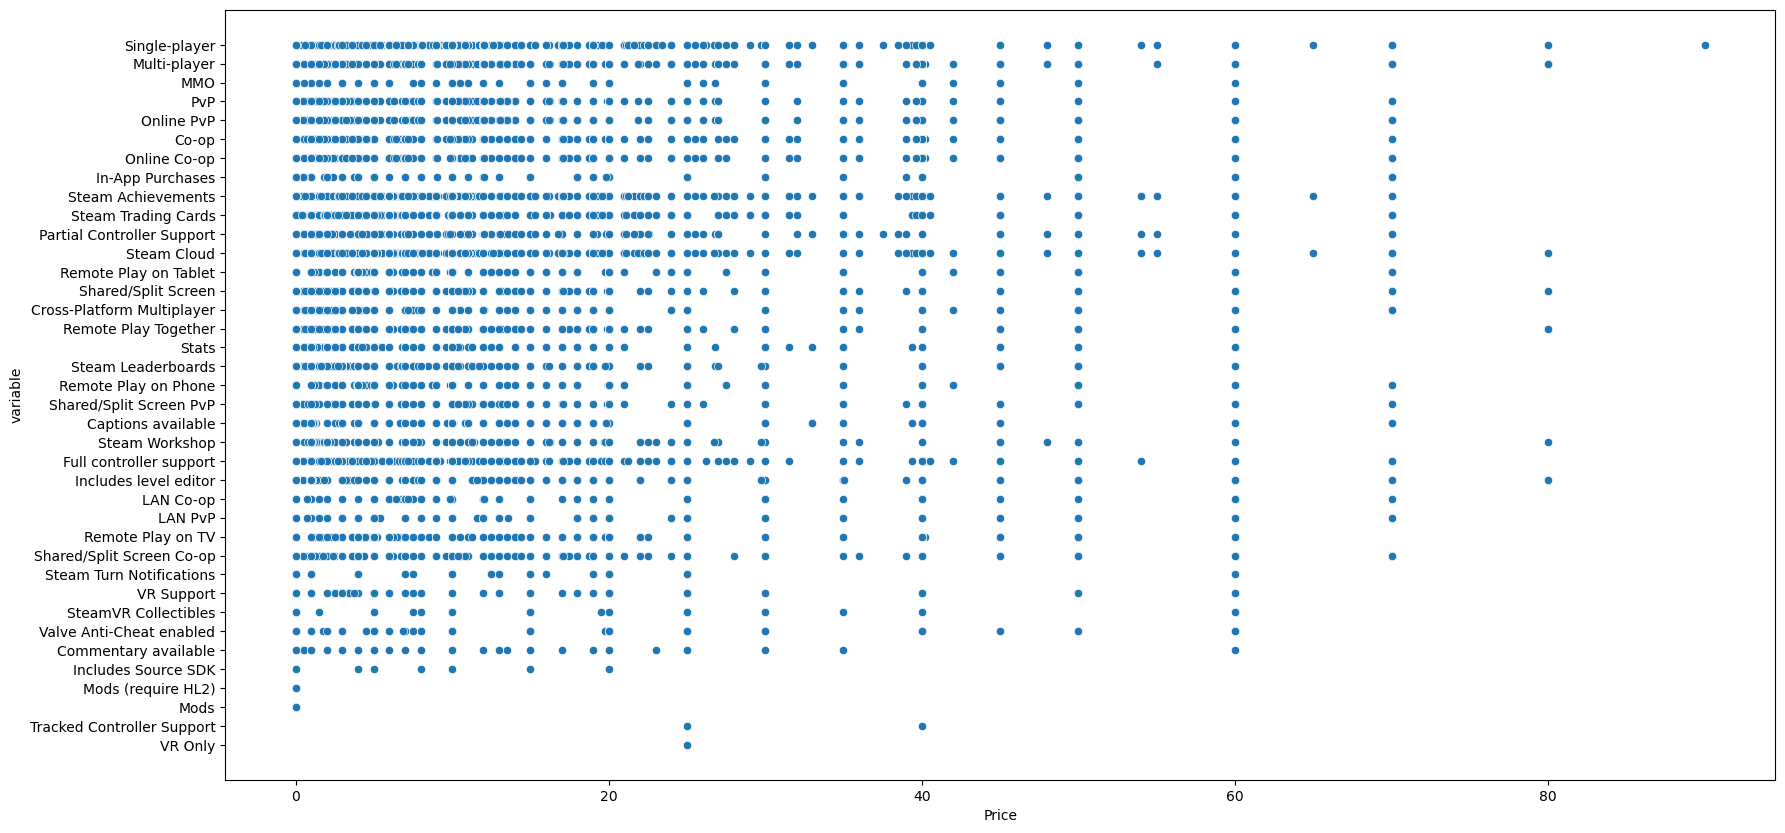

In [54]:
plt.figure(figsize=(20,10))
sb.scatterplot(data=T_table, x="Price", y='variable')
plt.show()

Looking at in app purchases

In [55]:
in_app_purchases = cat_table_melted.drop(cat_table_melted[cat_table_melted.variable != "In-App Purchases"].index)
in_app_purchases.describe()

,Price
count,16081.000000
mean,11.155303
std,11.493489
min,0.000000
25%,1.990000
50%,9.990000
75%,14.990000
max,89.990000


In [56]:
in_app_purchases.corr()

,Price,value
Price,1.000000,-0.114538
value,-0.114538,1.000000


correlations

In [57]:
# no_free = cat_price[cat_price.Price != 0]
corr_table = cat_price_a.corr()["Price"]
corr_table.head()

Price            1.000000
Single-player    0.130997
Multi-player     0.092344
MMO             -0.095813
PvP              0.065352
Name: Price, dtype: float64

In [58]:
for index, row in corr_table.items():
    if(row > 0.1 or row < -0.1):
        print(index, " aa ", row)

Price  aa  1.0
Single-player  aa  0.13099702739013705
Co-op  aa  0.11744335795006716
Online Co-op  aa  0.10692855385005279
In-App Purchases  aa  -0.11453755320453275
Steam Achievements  aa  0.14557709089517828
Steam Cloud  aa  0.24401637898443165
Remote Play on Tablet  aa  0.13369126878823448
Full controller support  aa  0.2159091275493702
Remote Play on TV  aa  0.14939899363813924


classification tree

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [60]:
#generate table of categories

json_table = []
a = cat_price.to_json(orient='records')
a = json.loads(a)

for j in a:
    test = {}
    cats = j["Categories"]
    test["AppID"] = j["AppID"]
    test["Name"] = j["Name"]
    test["Price"] = j["Price"]
    
    if cats != None:
        cats = cats.split(",")
        for i in cats:
            test[i] = 1

    json_table.append(test)

a = pd.DataFrame(json_table)
a.fillna(value=0, inplace=True)

a.head()

,AppID,Name,Price,Single-player,Multi-player,MMO,PvP,Online PvP,Co-op,Online Co-op,...,Steam Turn Notifications,VR Support,SteamVR Collectibles,Valve Anti-Cheat enabled,Commentary available,Includes Source SDK,Mods (require HL2),Mods,Tracked Controller Support,VR Only
0,1469160,Wartune Reborn,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,320150,Deadlings: Rotten Edition,3.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1026420,WARSAW,23.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,485000,Cthulhu Realms,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1454010,Diary of Lucie,12.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
regr = RandomForestRegressor()
#aaa = a.columns.tolist()
aaa = cat_cols[3:]
print(aaa)
print(len(aaa))


['Single-player', 'Multi-player', 'MMO', 'PvP', 'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases', 'Steam Achievements', 'Steam Trading Cards', 'Partial Controller Support', 'Steam Cloud', 'Remote Play on Tablet', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats', 'Steam Leaderboards', 'Remote Play on Phone', 'Shared/Split Screen PvP', 'Captions available', 'Steam Workshop', 'Full controller support', 'Includes level editor', 'LAN Co-op', 'LAN PvP', 'Remote Play on TV', 'Shared/Split Screen Co-op', 'Steam Turn Notifications', 'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Commentary available', 'Includes Source SDK', 'Mods (require HL2)', 'Mods', 'Tracked Controller Support', 'VR Only']
38


In [62]:
import collections
import math
import operator
import random
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, 3))

In [63]:
bbb = aaa
# print(len(bbb))
# trial = list(powerset(bbb))
# print(trial)
# print(len(trial))


In [64]:
mmax = 0
mmin = 1000
thing = ""
for index, row in corr_table.items():
    if(index == "Price"):
        continue
    if(row > mmax):
        mmax = row
        thing = index
    if(row < mmin):
        mmin = row
print("max: ",mmax," min ",mmin)
print(thing)

max:  0.24401637898443165  min  -0.11453755320453275
Steam Cloud


In [65]:
# ccc = [thing]
# final = []
# mini = 0
# end = 0
# bbb.remove(thing)
# print(bbb)
# while bbb != []:
#     ccc.append(bbb[0])
#     print(ccc)
#     bbb = bbb[1:]
#     X = a[ccc]
#     Y = a["Price"]
#     regr.fit(X, Y)
#     testt = regr.predict(X)
#     mse = mean_squared_error(Y, testt)
#     score = regr.score(X, Y)
#     if(score >= mini):
#         mini = score
#         final = ccc
#         end = mse
#     else:
#         ccc.pop()
    
#     print("score: ",score, " mse: ", mse)
    # print("", mse**(1/2))

In [66]:
# print(final)
# print(end**(1/2))
# mini

In [67]:
# for name, age in mydict.items():
#     if age == search_age:
#         print name
